In [1]:
using CSV
using DataFrames
using Plots
using LaTeXStrings

#### Rechnungen zur Vorbereitung

In [2]:
T_12 = 30.08 * 365.25 * 24 * 60 * 60 # s

9.492526079999999e8

In [3]:
log(2) / T_12

7.302030826339804e-10

### Auswertungsteil 0: Rohe Messdaten

##### Sample 6, 500 V, 45min:

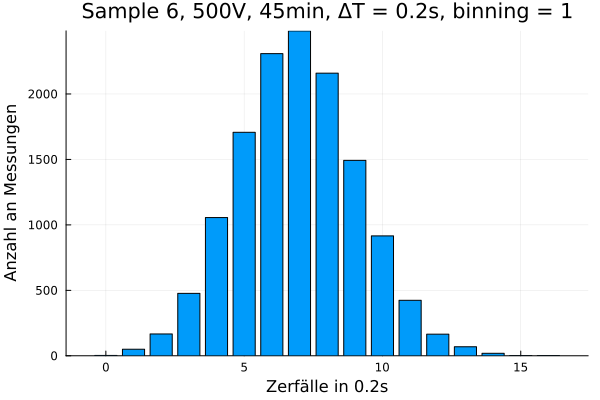

In [4]:
# ΔT = 0.2, binning = 1
zerfälle_6_500_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
anzahl_6_500_1 = [3,50,167,477,1056,1707,2308,2482,2159,1493,916,424,165,69,19,2,2]
plot(bar(zerfälle_6_500_1,anzahl_6_500_1,label=""), title="Sample 6, 500V, 45min, ΔT = 0.2s, binning = 1")
xlabel!("Zerfälle in 0.2s")
ylabel!("Anzahl an Messungen")

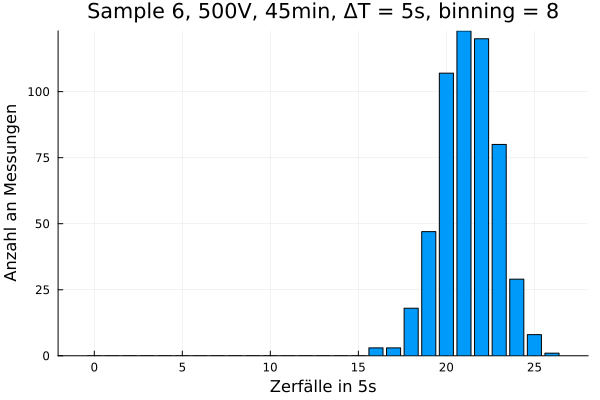

In [5]:
# ΔT = 5s, binning = 8
zerfälle_6_500_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
anzahl_6_500_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,18,47,107,123,120,80,29,8,1]
plot(bar(zerfälle_6_500_2,anzahl_6_500_2,label=""), title="Sample 6, 500V, 45min, ΔT = 5s, binning = 8")
xlabel!("Zerfälle in 5s")
ylabel!("Anzahl an Messungen")

##### Sample 6, 600V, 45min:

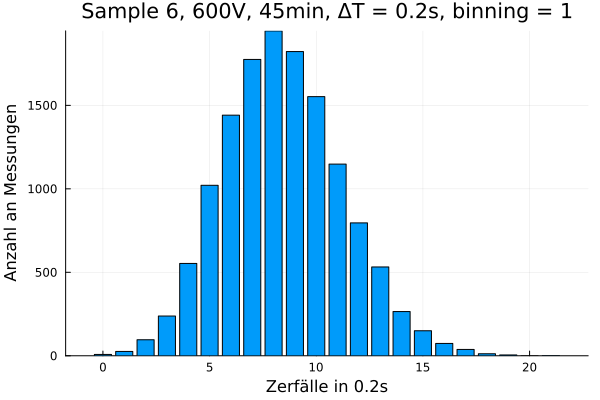

In [6]:
# ΔT = 0.2s, binning = 1
zerfälle_6_600_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
anzahl_6_600_1 = [8,26,96,238,553,1021,1441,1775,1946,1822,1552,1148,796,532,265,150,74,38,12,5,0,1]
plot(bar(zerfälle_6_600_1,anzahl_6_600_1,label=""), title="Sample 6, 600V, 45min, ΔT = 0.2s, binning = 1")
xlabel!("Zerfälle in 0.2s")
ylabel!("Anzahl an Messungen")

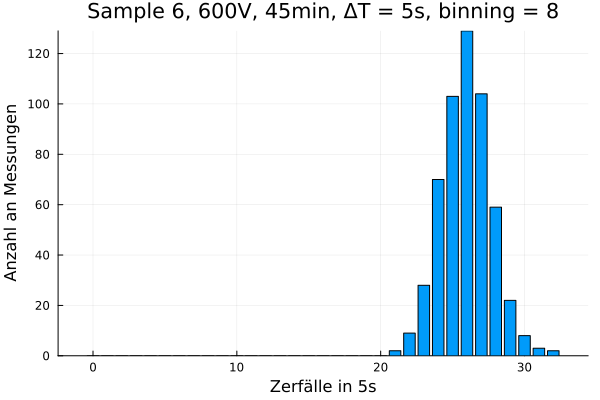

In [7]:
# ΔT = 5s, binning = 8
zerfälle_6_600_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
anzahl_6_600_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,9,28,70,103,129,104,59,22,8,3,2]
plot(bar(zerfälle_6_600_2,anzahl_6_600_2,label=""), title="Sample 6, 600V, 45min, ΔT = 5s, binning = 8")
xlabel!("Zerfälle in 5s")
ylabel!("Anzahl an Messungen")

##### Sample 6+7, 500V, 45min:

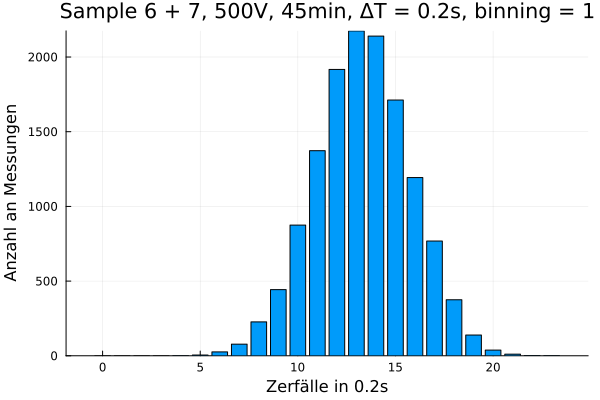

In [8]:
# ΔT = 0.2s, binning = 1
zerfälle_6und7_500_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
anzahl_6und7_500_1 = [0,0,0,0,1,5,26,78,227,443,875,1373,1917,2175,2140,1712,1193,768,375,139,38,11,2,1]
plot(bar(zerfälle_6und7_500_1,anzahl_6und7_500_1,label=""), title="Sample 6 + 7, 500V, 45min, ΔT = 0.2s, binning = 1")
xlabel!("Zerfälle in 0.2s")
ylabel!("Anzahl an Messungen")

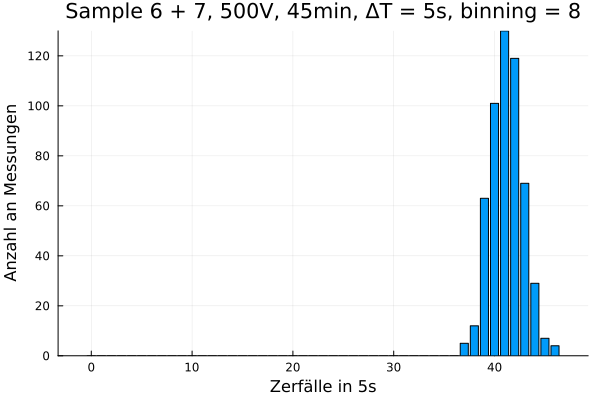

In [9]:
# ΔT = 5s, binning = 8
zerfälle_6und7_500_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
    35,36,37,38,39,40,41,42,43,44,45,46]
anzahl_6und7_500_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,12,63,101,130,119,69,
    29,7,4]
plot(bar(zerfälle_6und7_500_2,anzahl_6und7_500_2,label=""), title="Sample 6 + 7, 500V, 45min, ΔT = 5s, binning = 8")
xlabel!("Zerfälle in 5s")
ylabel!("Anzahl an Messungen")

### Auswertungsteil 1: Poisson-Verteilung

In [10]:
# Poissonverteilung:
λ = 10 # (Testwert) Mittelwert λ
N = 10 # (Testwert) Normierungsfaktor N = Summe der Höhe aller Balken
P(n) = N * λ^big(n) * exp(-λ) / factorial(big(n))

P (generic function with 1 method)

Sample 6, 500V, 45min, ΔT = 0.2s, binning = 1:

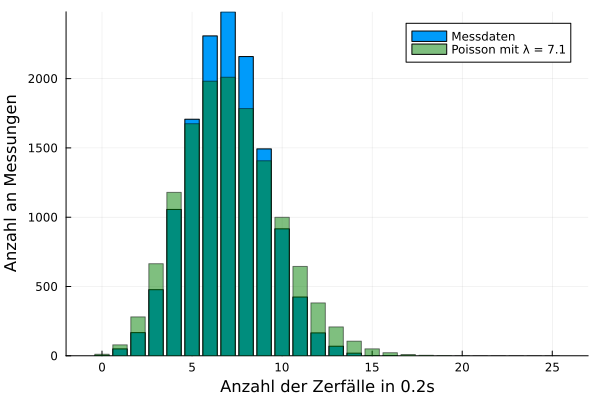

In [11]:
# Messdaten mit ΔT = 0.2, binning = 1
zerfälle_6_500_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
anzahl_6_500_1 = [3,50,167,477,1056,1707,2308,2482,2159,1493,916,424,165,69,19,2,2]

# Passende Poissonverteilung:
λ = 7.1
N = sum(anzahl_6_500_1)
P(n) = N * λ^big(n) * exp(-λ) / factorial(big(n))

#Plot
poisson1 = bar(zerfälle_6_500_1,anzahl_6_500_1,label="Messdaten")
bar!(0:25,P,color=:green,label="Poisson mit λ = $λ",alpha=0.5)
xlabel!("Anzahl der Zerfälle in 0.2s")
ylabel!("Anzahl an Messungen")

In [12]:
savefig(poisson1, "../../media/B3.1/poisson1.pdf");

Sample 6, 600V, 45min, ΔT = 0.2s, binning = 1:

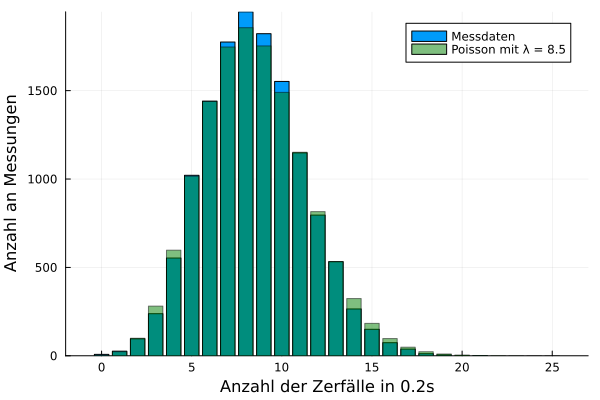

In [13]:
# Messdaten mit ΔT = 0.2s, binning = 1
zerfälle_6_600_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
anzahl_6_600_1 = [8,26,96,238,553,1021,1441,1775,1946,1822,1552,1148,796,532,265,150,74,38,12,5,0,1]

# Passende Poissonverteilung:
λ = 8.5
N = sum(anzahl_6_600_1)
P(n) = N * λ^big(n) * exp(-λ) / factorial(big(n))

# Plot
poisson2 = bar(zerfälle_6_600_1,anzahl_6_600_1,label="Messdaten")
bar!(0:25,P,color=:green,label="Poisson mit λ = $λ",alpha=0.5)
xlabel!("Anzahl der Zerfälle in 0.2s")
ylabel!("Anzahl an Messungen")

In [14]:
savefig(poisson2, "../../media/B3.1/poisson2.pdf");

Sample 6 + 7, 500V, 45min, ΔT = 0.2s, binning = 1:

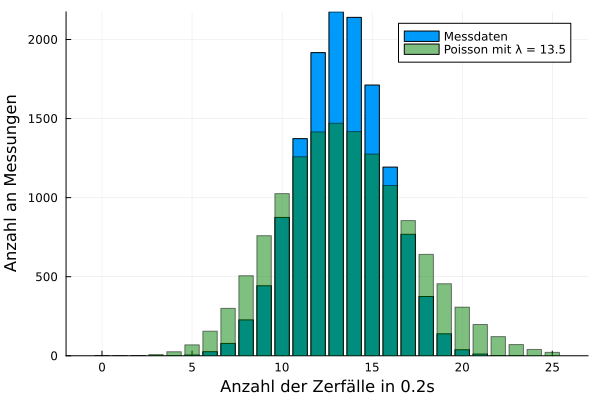

In [15]:
# Messdaten mit ΔT = 0.2s, binning = 1
zerfälle_6und7_500_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
anzahl_6und7_500_1 = [0,0,0,0,1,5,26,78,227,443,875,1373,1917,2175,2140,1712,1193,768,375,139,38,11,2,1]

# Passende Poissonverteilung:
λ = 13.5
N = sum(anzahl_6und7_500_1)
P(n) = N * λ^big(n) * exp(-λ) / factorial(big(n))

# Plot
poisson3 = bar(zerfälle_6und7_500_1,anzahl_6und7_500_1,label="Messdaten")
bar!(0:25,P,color=:green,label="Poisson mit λ = $λ",alpha=0.5)
xlabel!("Anzahl der Zerfälle in 0.2s")
ylabel!("Anzahl an Messungen")

In [16]:
savefig(poisson3, "../../media/B3.1/poisson3.pdf");

Alle Poisson-Verteilungen zusammen:

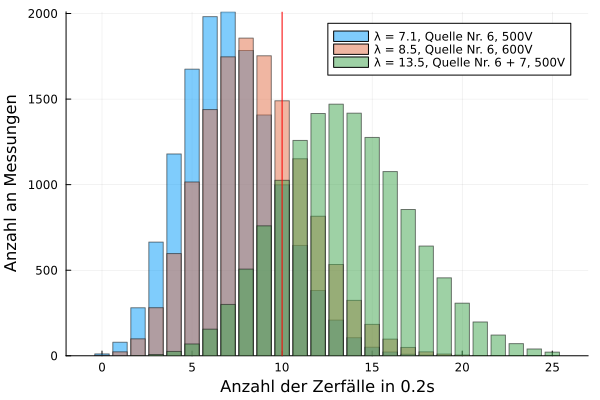

In [17]:
# Messdaten mit ΔT = 0.2, binning = 1
zerfälle_6_500_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
anzahl_6_500_1 = [3,50,167,477,1056,1707,2308,2482,2159,1493,916,424,165,69,19,2,2]

# Passende Poissonverteilung:
λ = 7.1
N = sum(anzahl_6_500_1)
P(n) = N * λ^big(n) * exp(-λ) / factorial(big(n))

#Plot
allePoisson = bar(0:25,P,label="λ = $λ, Quelle Nr. 6, 500V",alpha=0.5)

# Messdaten mit ΔT = 0.2s, binning = 1
zerfälle_6_600_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
anzahl_6_600_1 = [8,26,96,238,553,1021,1441,1775,1946,1822,1552,1148,796,532,265,150,74,38,12,5,0,1]

# Passende Poissonverteilung:
λ = 8.5
N = sum(anzahl_6_600_1)
P(n) = N * λ^big(n) * exp(-λ) / factorial(big(n))

# Plot
bar!(0:25,P,label="λ = $λ, Quelle Nr. 6, 600V",alpha=0.5)

# Messdaten mit ΔT = 0.2s, binning = 1
zerfälle_6und7_500_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
anzahl_6und7_500_1 = [0,0,0,0,1,5,26,78,227,443,875,1373,1917,2175,2140,1712,1193,768,375,139,38,11,2,1]

# Passende Poissonverteilung:
λ = 13.5
N = sum(anzahl_6und7_500_1)
P(n) = N * λ^big(n) * exp(-λ) / factorial(big(n))

# Plot
bar!(0:25,P,label="λ = $λ, Quelle Nr. 6 + 7, 500V",alpha=0.5)
xlabel!("Anzahl der Zerfälle in 0.2s")
ylabel!("Anzahl an Messungen")

# Plot Faustregel
vline!([10], color=:red, label="")

In [18]:
savefig(allePoisson, "../../media/B3.1/allePoisson.pdf");

### Auswertungsteil 2: Gaußverteilung

In [19]:
# Gaußverteilung
z_strich = 10 # (Testwert) gemessene Zählrate z_strich (hängt von Sample und Spannung ab)
n = 8 # Binning (für alle Messungen gleich)
Δt = 5 # (für alle Messungen gleich)
m = z_strich * Δt / n # Mittelwert m
F = 10 # (Testwert) Normierungsfaktor F = Summe der Höhe aller Balken
G(x) = 1/sqrt(2 * π * m) * F * sqrt(n) * exp(- (x - m)^2 / (2 * m / n))

G (generic function with 1 method)

Sample 6, 500V, 45min, ΔT = 5s, binning = 8:

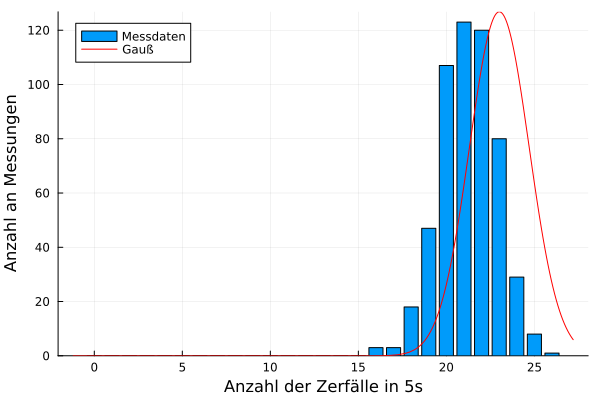

In [20]:
# Messdaten mit ΔT = 5s, binning = 8
zerfälle_6_500_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
anzahl_6_500_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,18,47,107,123,120,80,29,8,1]

# Passende Gaußverteilung:
z_strich = 11044/300 # Aus Kurzmessung
m = z_strich * Δt / n
F = sum(anzahl_6_500_2)
G(x) = 1/sqrt(2 * π * m) * F * sqrt(n) * exp(- (x - m)^2 / (2 * m / n))

# Plot
gauß1 = plot(bar(zerfälle_6_500_2,anzahl_6_500_2,label="Messdaten"), legend=:topleft)
plot!(G,color=:red,label="Gauß")
xlabel!("Anzahl der Zerfälle in 5s")
ylabel!("Anzahl an Messungen")

In [21]:
[m,F,z_strich]

3-element Vector{Float64}:
  23.008333333333333
 539.0
  36.81333333333333

In [22]:
savefig(gauß1, "../../media/B3.1/gauß1.pdf");

Sample 6, 600V, 45min, ΔT = 5s, binning = 8:

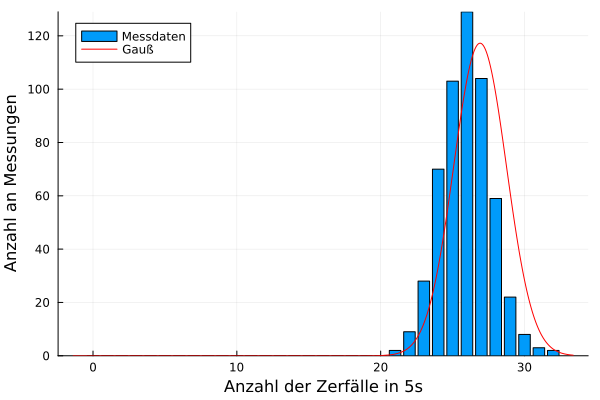

In [23]:
# Messdaten mit ΔT = 5s, binning = 8
zerfälle_6_600_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
anzahl_6_600_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,9,28,70,103,129,104,59,22,8,3,2]

# Passende Gaußverteilung:
z_strich = 12917/300 # Aus Kurzmessung
m = z_strich * Δt / n
F = sum(anzahl_6_600_2)
G(x) = 1/sqrt(2 * π * m) * F * sqrt(n) * exp(- (x - m)^2 / (2 * m / n))

# Plot
gauß2 = plot(bar(zerfälle_6_600_2,anzahl_6_600_2,label="Messdaten"), legend=:topleft)
plot!(G,color=:red,label="Gauß")
xlabel!("Anzahl der Zerfälle in 5s")
ylabel!("Anzahl an Messungen")

In [24]:
[m,F,z_strich]

3-element Vector{Float64}:
  26.910416666666666
 539.0
  43.056666666666665

In [25]:
savefig(gauß2, "../../media/B3.1/gauß2.pdf");

Sample 6 + 7, 500V, 45min, ΔT = 5s, binning = 8:

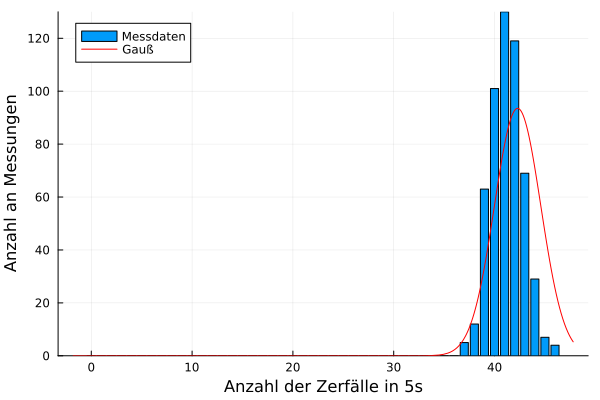

In [26]:
# Messdaten mit ΔT = 5s, binning = 8
zerfälle_6und7_500_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
    35,36,37,38,39,40,41,42,43,44,45,46]
anzahl_6und7_500_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,12,63,101,130,119,69,
    29,7,4]

# Passende Gaußverteilung:
z_strich = 20300/300 # Aus Kurzmessung
m = z_strich * Δt / n
F = sum(anzahl_6und7_500_2)
G(x) = 1/sqrt(2 * π * m) * F * sqrt(n) * exp(- (x - m)^2 / (2 * m / n))

# Plot
gauß3 = plot(bar(zerfälle_6und7_500_2,anzahl_6und7_500_2,label="Messdaten"), legend=:topleft)
plot!(G,color=:red,label="Gauß")
xlabel!("Anzahl der Zerfälle in 5s")
ylabel!("Anzahl an Messungen")

In [27]:
[m,F,z_strich]

3-element Vector{Float64}:
  42.29166666666667
 539.0
  67.66666666666667

In [28]:
savefig(gauß3, "../../media/B3.1/gauß3.pdf");

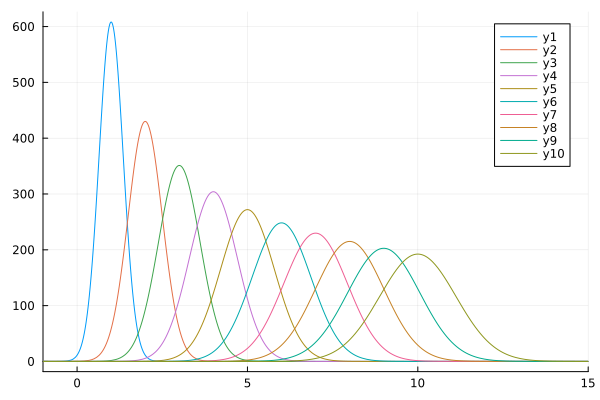

In [29]:
G(x) = 1/sqrt(2 * π * m) * F * sqrt(n) * exp(- (x - m)^2 / (2 * m / n))
m = 1
plot(G, xaxis=[-1,15])
m=2
plot!(G)
m=3
plot!(G)
m=4
plot!(G)
m=5
plot!(G)
m=6
plot!(G)
m=7
plot!(G)
m=8
plot!(G)
m=9
plot!(G)
m=10
plot!(G)

### Auswertungsteil 3: Intervall-Verteilung

##### Plotten der Messwerte

In [30]:
interval0 = CSV.read("sample_6/500V_45min/interval_0.001_1.csv", DataFrame)
interval1 = CSV.read("sample_6/500V_45min/interval_0.001_2.csv", DataFrame)
interval2 = CSV.read("sample_6/500V_45min/interval_0.001_3.csv", DataFrame)
;

In [31]:
# Sample 6, 500V, 45min
interval = bar(interval0[1:200, :zeitindex], interval0[1:200, :anzahl], alpha=0.5, label="n = 0")
bar!(interval1[1:200, :zeitindex], interval1[1:200, :anzahl], alpha=0.5, label="n = 1")
bar!(interval2[1:200, :zeitindex], interval2[1:200, :anzahl], alpha=0.5, label="n = 2")
xlabel!("Zeitdifferenz [ms]")
ylabel!("Anzahl an Messungen")

LoadError: ArgumentError: column name :zeitindex not found in the data frame

In [32]:
savefig(interval, "../media/B3.1/interval.pdf");

LoadError: UndefVarError: `interval` not defined

##### Fitten für n=0
- Alle Messwerte im Bereich t $\in$ [0,totzeit] abschneiden und den Rest fitten

In [33]:
# Plot
totzeitIndex = 8
intervalFit = bar(interval0[1:totzeitIndex, :zeitindex], interval0[1:totzeitIndex, :anzahl],
    color=:red, alpha=0.3, label="Für Fit ausgeschlossene Messwerte", title="", legend=:topright)
bar!(interval0[(totzeitIndex+1):100, :zeitindex],
    interval0[(totzeitIndex+1):100, :anzahl], color=:blue, alpha=0.5, label="Für Fit betrachtete Messwerte", title="")

# Intervallverteilung mit skaliertem N (für n = 0)
a = 0.043 # Fitparameter zwischen 0.042 und 0.044
T = 2699.959473 # s Gesamtdauer der Messung = 45 min oder letzter gemessener Zeitpunkt?
N = 1000*T * a # Normierungskonstante
I(t) = N * a * exp(- a * t)
plot!(totzeitIndex:100,I,label="Theoretische Intervallfunktion mit a = $a 1/ms", color=:red)

xlabel!("Zeitdifferenz [ms]")
ylabel!("Anzahl an Messungen")

LoadError: ArgumentError: column name :zeitindex not found in the data frame

In [34]:
savefig(intervalFit, "../media/B3.1/intervalFit.pdf");

LoadError: UndefVarError: `intervalFit` not defined

##### Totzeit bestimmen

a = a_strich / (1 - a_strich * τ) <=> τ = 1/a_strich - 1/a

In [35]:
a_strich = 11044/300 * 10^(-3) # ms Gemessene Zählrate aus Kurzzeitmessung
τ = 1/a_strich - 1/a # ms

LoadError: UndefVarError: `a` not defined